In [5]:
import napari
import numpy as np
from napari_clusters_plotter.plotter import PlotterWidget
from skimage.measure import regionprops
import pandas as pd
from napari.utils import nbscreenshot

In [2]:
viewer = napari.Viewer()
plotter = PlotterWidget(viewer)

# Generating the original image with random values
original_image = np.random.randint(0, 100, size=(5, 20, 20)).reshape(5, 1, 20, 20)

# Generating the segmentation image with labels
segmentation_image = np.zeros_like(original_image)

# Assign labels in the segmentation image based on predefined criteria
for frame in range(5):
    segmentation_image[frame, 0, :5, :5] = 1  # Label 1 in all frames
    segmentation_image[frame, 0, 5:10, :5] = 2  # Label 2 in all frames
    segmentation_image[frame, 0, 10:15, :5] = 3  # Label 3 in all frames
    if frame < 3:  # Label 4 in the first 3 frames
        segmentation_image[frame, 0, 15:20, :5] = 4
    if frame != 2:  # Label 5 in all frames except the third
        segmentation_image[frame, 0, :5, 15:20] = 5

# Function to calculate region properties for each label in each frame
def calculate_region_properties(original_img, label_img):
    data = []
    for frame in range(original_img.shape[0]):
        frame_data = original_img[frame, 0]
        label_frame_data = label_img[frame, 0]
        for region in regionprops(label_frame_data, intensity_image=frame_data):
            label = region.label
            mean_intensity = region.mean_intensity
            intensity_std = np.std(region.intensity_image)
            data.append([frame, label, mean_intensity, intensity_std])
    return pd.DataFrame(data, columns=['Frame', 'Label', 'Mean Intensity', 'Std Dev Intensity'])

# Calculate region properties
region_properties_df = calculate_region_properties(original_image, segmentation_image)

# add images to napari
viewer.add_image(original_image, name='Original Image')
viewer.add_labels(segmentation_image, name='Segmentation Image', features=region_properties_df)

viewer.window.add_dock_widget(plotter, area="right")

In [3]:
x = region_properties_df['Frame'].values
y = region_properties_df['Mean Intensity'].values
plotter.scatter_plot.data = (x, y)

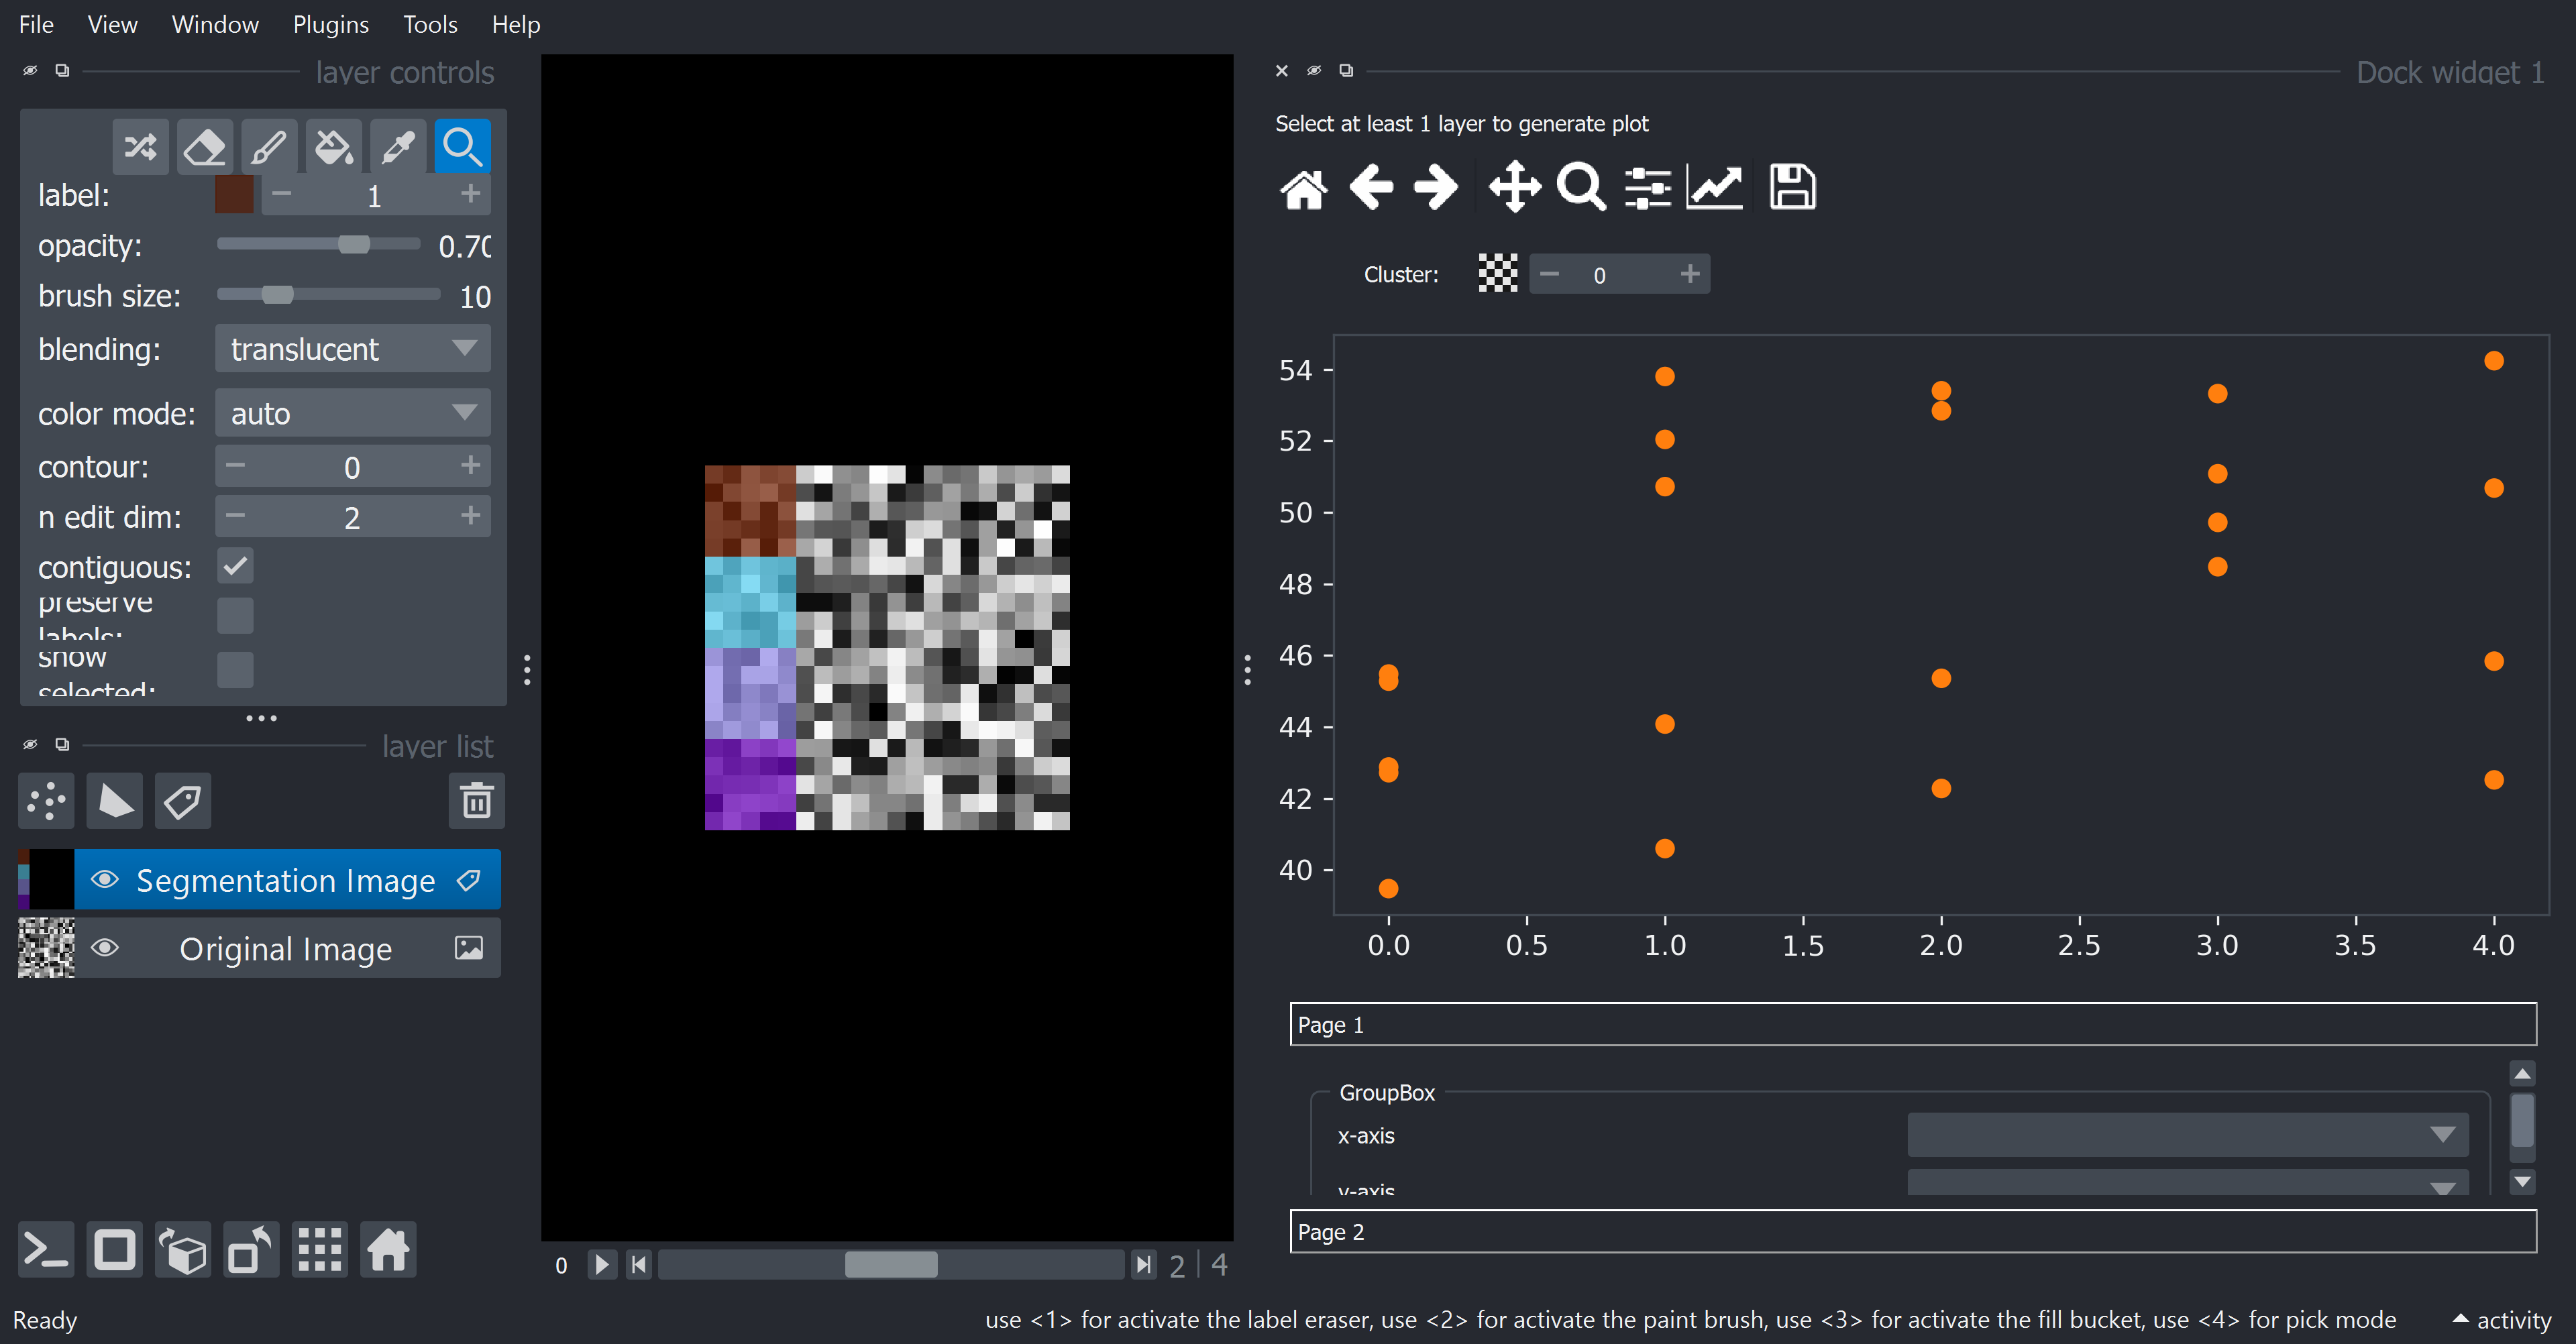

In [6]:
nbscreenshot(viewer)